## Packages Importing

In [1]:
 !pip install mplcyberpunk


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling  import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
os.chdir('/kaggle/input/titanic/')
!ls


gender_submission.csv  test.csv  train.csv


## Loading the data Files into a pandas dataframe

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

## Showing the Head of the Data

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Exploratory Data Analysis

### Descriptive Statistics

In [8]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


### Correlation

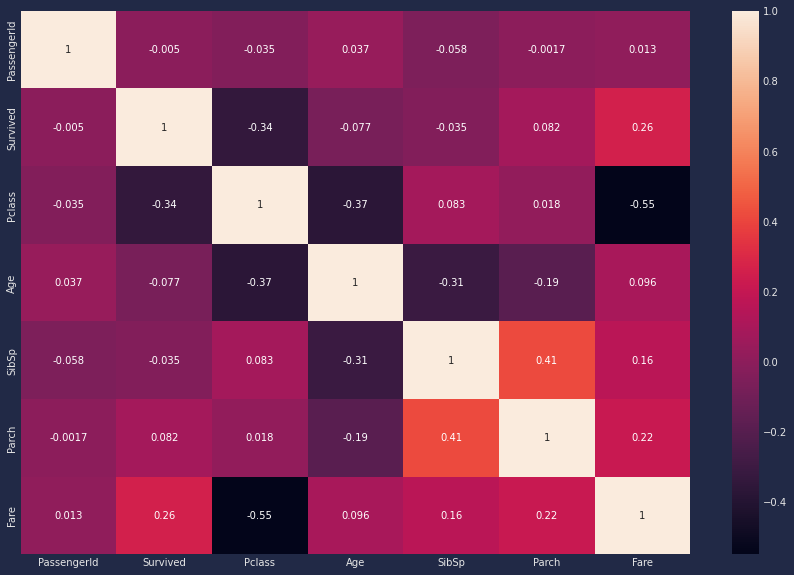

In [10]:
# Using Heatmap to visualize the Correlation.
plt.style.use("cyberpunk")
cor = train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

plt.show()

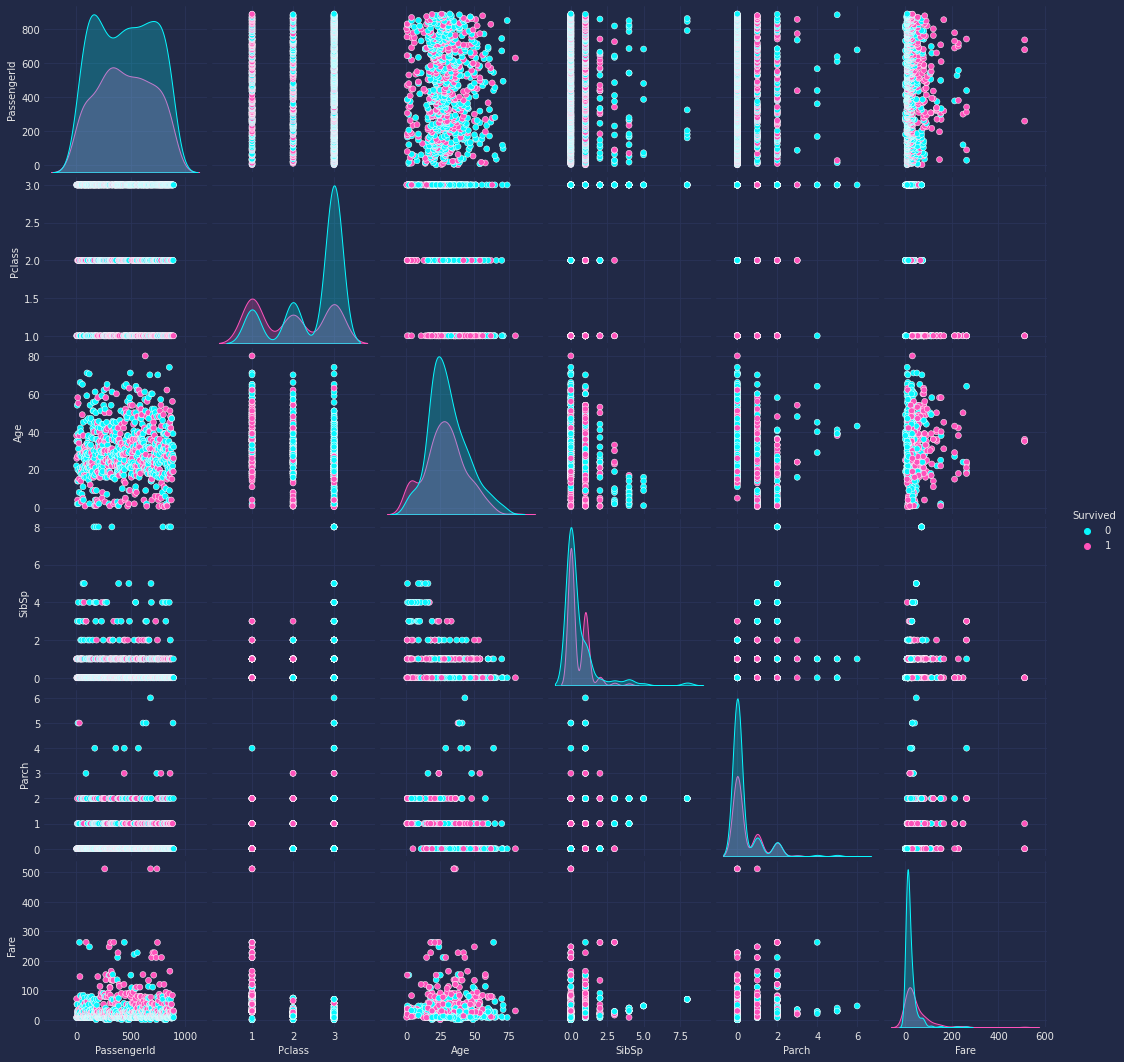

In [11]:
sns.pairplot(train,hue='Survived')

### Features Disturbtions

In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
# Sex
label = train['Sex'].unique()
data = train['Sex'].value_counts()

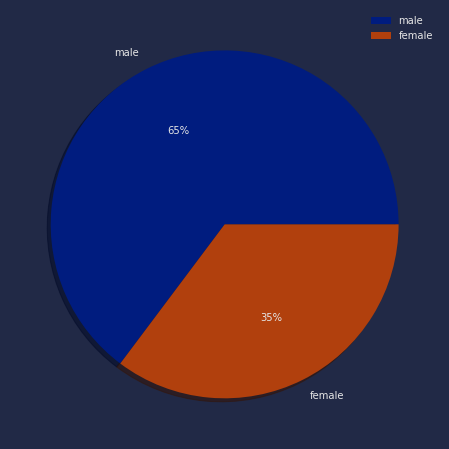

In [14]:
colors = sns.color_palette('dark')
plt.figure(figsize=(8,8))
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%',shadow=True,)
mplcyberpunk.add_underglow()
plt.legend()
plt.show()

In [15]:
# Survived
label = ['No Survived','Survived']
data = train['Survived'].value_counts()

In [16]:
data

0    549
1    342
Name: Survived, dtype: int64

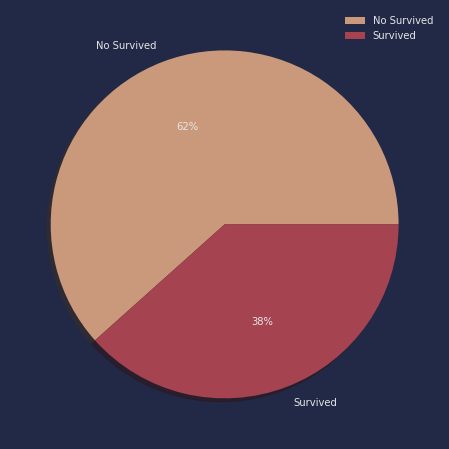

In [17]:
colors = sns.color_palette('twilight_r')
plt.figure(figsize=(8,8))
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%',shadow=True,)
mplcyberpunk.add_underglow()
plt.legend()
plt.show()

<AxesSubplot:xlabel='count', ylabel='Sex'>

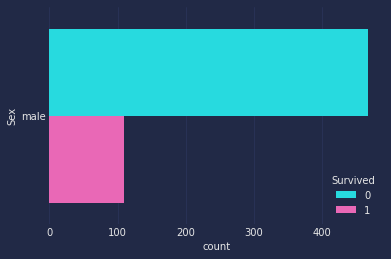

In [18]:
# Sex and Survived (sex = male)
male = train['Sex'].where(train['Sex']=='male')
sns.countplot(y=male,hue=train['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

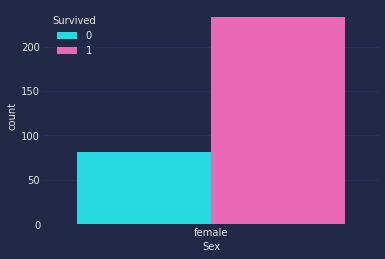

In [19]:
# Sex and Survived (sex = female)
female = train['Sex'].where(train['Sex']=='female')
sns.countplot(x=female,hue=train['Survived'])

In [20]:
# pclass

label = ['3rd Class','2nd Class','1st Class']
data = train['Pclass'].value_counts()

In [21]:
data

3    491
1    216
2    184
Name: Pclass, dtype: int64

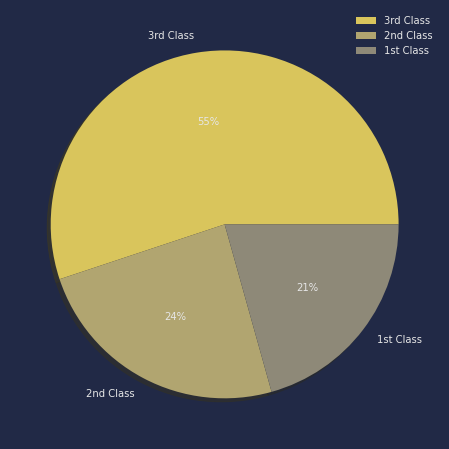

In [22]:
colors = sns.color_palette('cividis_r')
plt.figure(figsize=(8,8))
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%',shadow=True,)
mplcyberpunk.add_underglow()
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


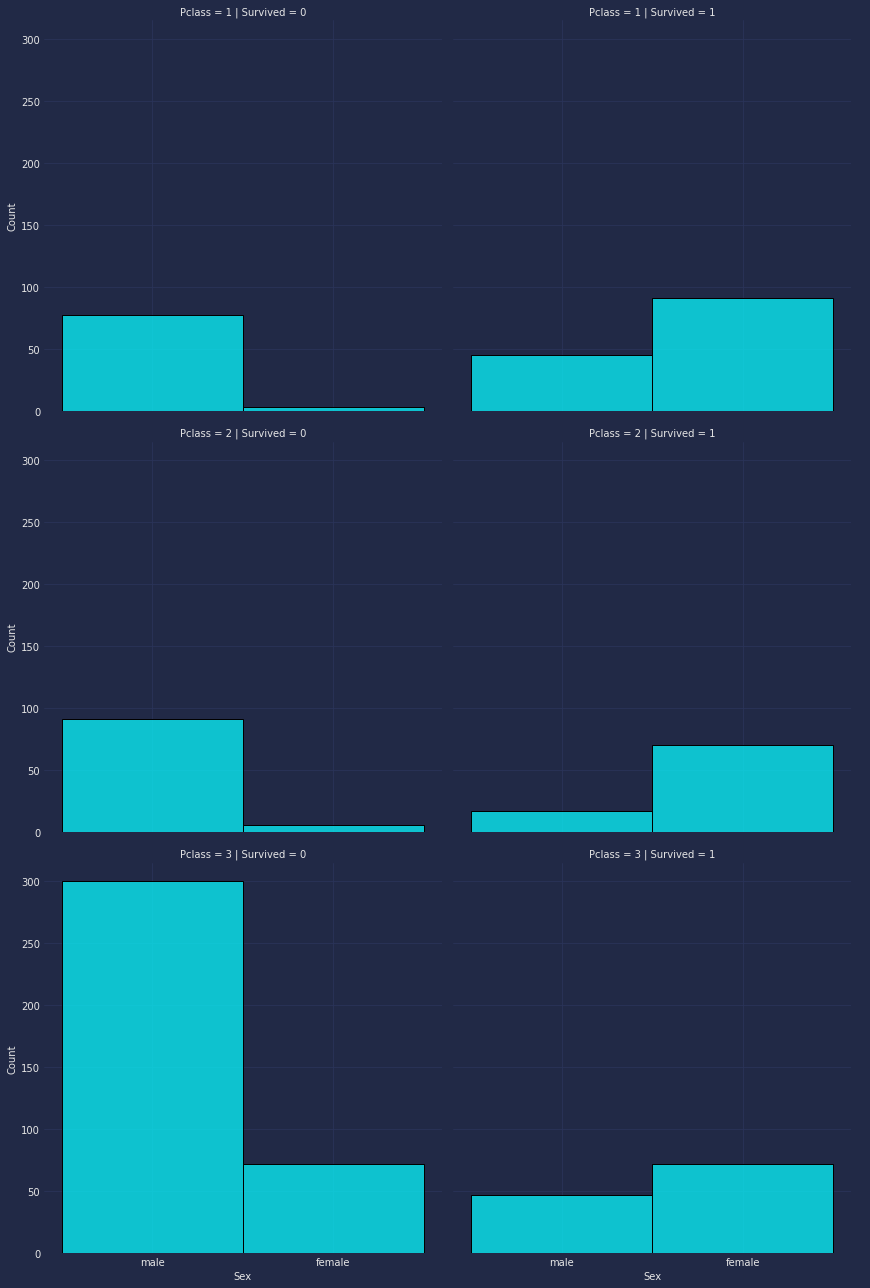

In [23]:
# Sex with Survived and Pclass
sns.FacetGrid(train, col='Survived', row='Pclass', size=6) \
   .map(sns.histplot,'Sex') \
   .add_legend()

In [24]:
# Age
age_groups = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'] # age groups

# split the passengers into age groups of 10 years
train['AgeGroup'] = pd.cut(train['Age'], range(0, 90, 10), labels=age_groups)

test['AgeGroup'] = pd.cut(test['Age'], range(0, 90, 10), labels=age_groups)


In [25]:
label = ['21-30', '31-40', '11-20', '41-50', '1-10', '51-60', '61-70', '71-80']
data = train['AgeGroup'].value_counts()

In [26]:
data

21-30    230
31-40    155
11-20    115
41-50     86
1-10      64
51-60     42
61-70     17
71-80      5
Name: AgeGroup, dtype: int64

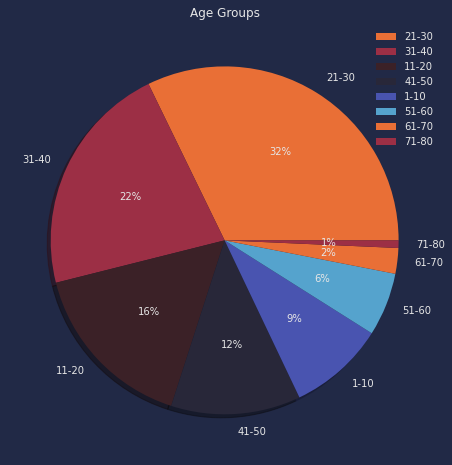

In [27]:
colors = sns.color_palette('icefire_r')
plt.figure(figsize=(8,8))
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%',shadow=True,)
mplcyberpunk.add_underglow()
plt.legend()
plt.title('Age Groups')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


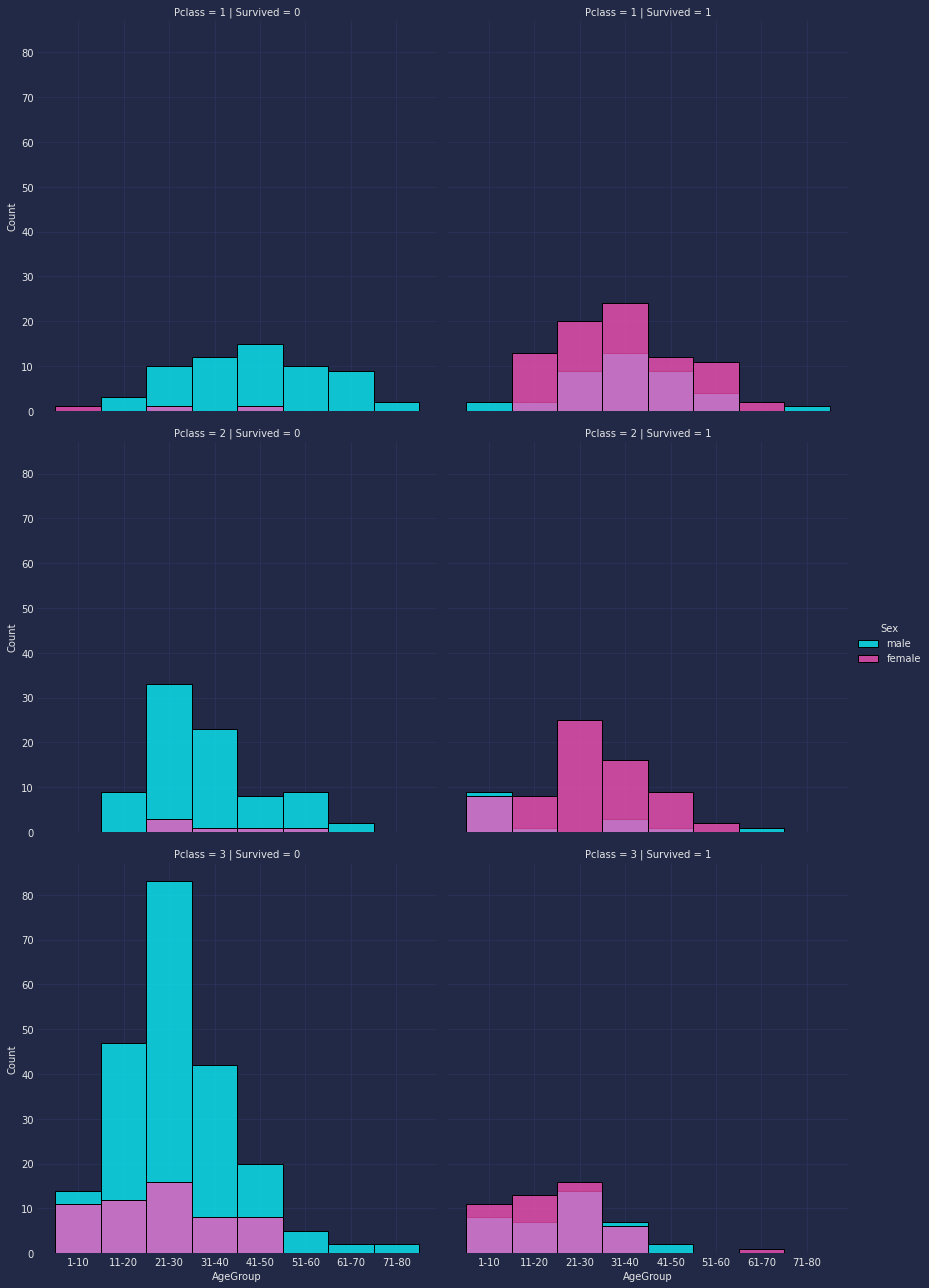

In [28]:
# Survived, Pclass, Sex, ,AgeGroup
sns.FacetGrid(train, col='Survived', row='Pclass',hue='Sex', size=6) \
   .map(sns.histplot,'AgeGroup') \
   .add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


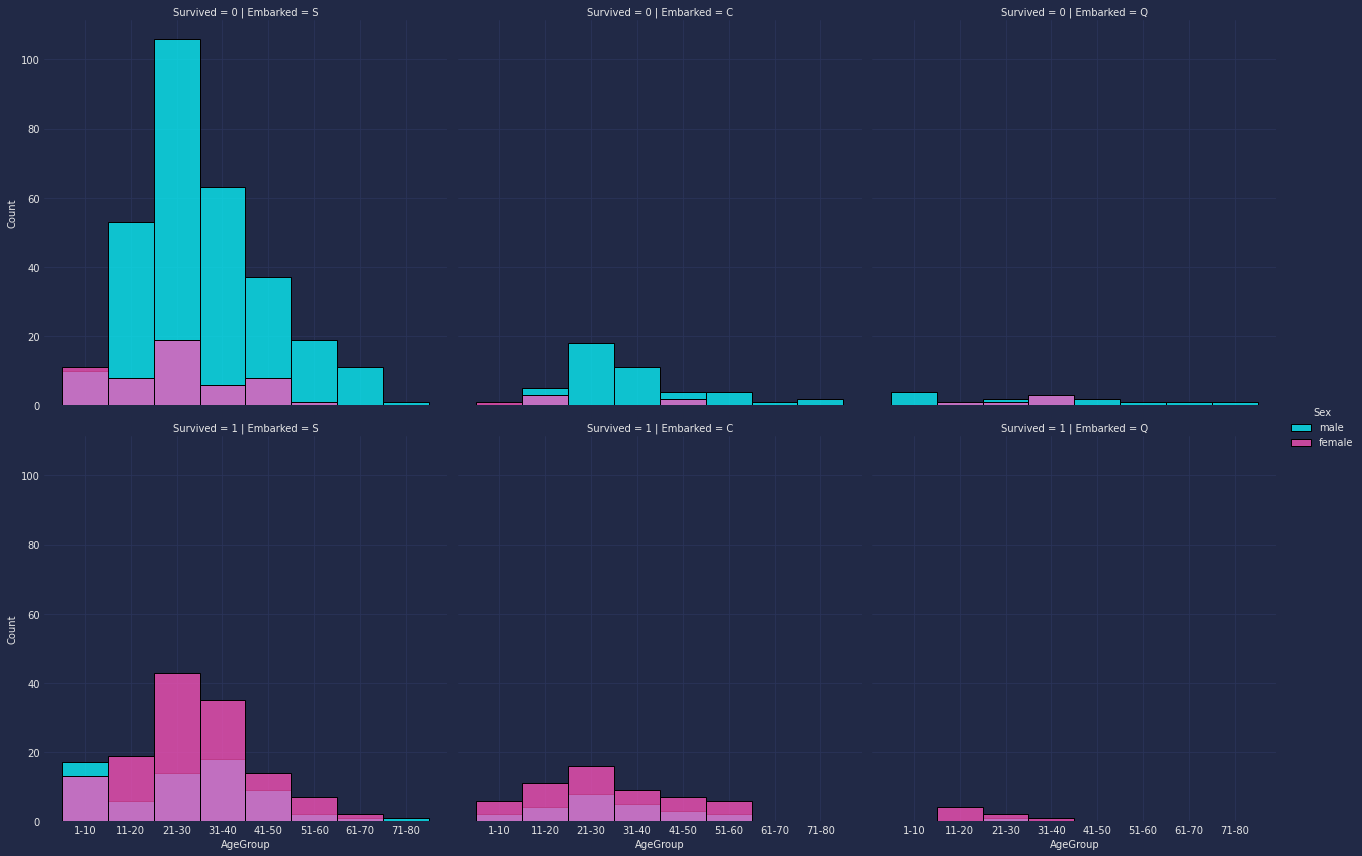

In [29]:
# Survived, Embarked, Sex, ,AgeGroup
sns.FacetGrid(train, col='Embarked', row='Survived',hue='Sex', size=6) \
   .map(sns.histplot,'AgeGroup') \
   .add_legend()

## Drop Un Necessary Columns

In [30]:
# train
train.drop(['Cabin','Age','PassengerId','Ticket', 'Name'],axis=1,inplace=True)

# test
test.drop(['Cabin','Age','PassengerId','Ticket', 'Name'],axis=1,inplace=True)

## Check a Missing Value

In [31]:
# train
print(train.isnull().sum().sort_values(ascending=False))

AgeGroup    177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64


In [32]:
# test
print(test.isnull().sum().sort_values(ascending=False))

AgeGroup    86
Fare         1
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64


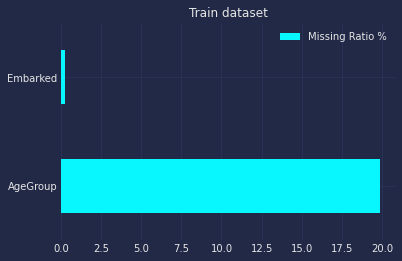

In [33]:
  if train.isnull().sum().sum() != 0:
        na_df = (train.isnull().sum() / len(train)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.title('Train dataset')
        plt.show()

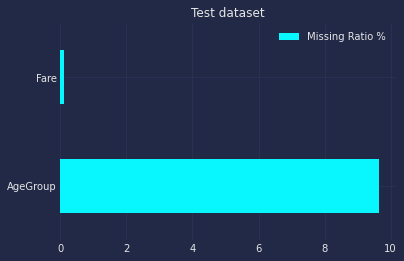

In [34]:
if test.isnull().sum().sum() != 0:
        na_df = (test.isnull().sum() / len(train)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.title('Test dataset')
        plt.show()

### examine the numerical features.

In [35]:
# Train
numeric_features = train.select_dtypes(include=[np.number])
print(numeric_features.columns)
print('****************************************************************************')
print(f'There is {numeric_features.shape[1]} numeric features.')

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare'], dtype='object')
****************************************************************************
There is 5 numeric features.


In [36]:
# Test
numeric_features = test.select_dtypes(include=[np.number])
print(numeric_features.columns)
print('****************************************************************************')
print(f'There is {numeric_features.shape[1]} numeric features.')

Index(['Pclass', 'SibSp', 'Parch', 'Fare'], dtype='object')
****************************************************************************
There is 4 numeric features.


###  examine the categorical features.

In [37]:
# Train
categorical_features = train.select_dtypes(include=[np.object_,"category"])
print(categorical_features.columns)
print('****************************************************************************')
print(f'There is {categorical_features.shape[1]} categorical features.')

Index(['Sex', 'Embarked', 'AgeGroup'], dtype='object')
****************************************************************************
There is 3 categorical features.


In [38]:
# Test
categorical_features = test.select_dtypes(include=[np.object_,"category"])
print(categorical_features.columns)
print('****************************************************************************')
print(f'There is {categorical_features.shape[1]} categorical features.')

Index(['Sex', 'Embarked', 'AgeGroup'], dtype='object')
****************************************************************************
There is 3 categorical features.


###  Deal with missing values

In [39]:
# numeric features
test['Fare'].fillna(test['Fare'].mean(),inplace=True)
test['AgeGroup'].fillna(test['AgeGroup'].mode()[0], inplace=True)

# categorical features
train['AgeGroup'].fillna(train['AgeGroup'].mode()[0], inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Fare      891 non-null    float64 
 6   Embarked  891 non-null    object  
 7   AgeGroup  891 non-null    category
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 50.1+ KB


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    int64   
 1   Sex       418 non-null    object  
 2   SibSp     418 non-null    int64   
 3   Parch     418 non-null    int64   
 4   Fare      418 non-null    float64 
 5   Embarked  418 non-null    object  
 6   AgeGroup  418 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 20.5+ KB


### Dummy variables

In [42]:
dummy_cols = ['Sex','Embarked','AgeGroup']
train = pd.get_dummies(train,columns=dummy_cols)

In [43]:
dummy_cols = ['Sex','Embarked','AgeGroup']
test = pd.get_dummies(test,columns=dummy_cols)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   SibSp           891 non-null    int64  
 3   Parch           891 non-null    int64  
 4   Fare            891 non-null    float64
 5   Sex_female      891 non-null    uint8  
 6   Sex_male        891 non-null    uint8  
 7   Embarked_C      891 non-null    uint8  
 8   Embarked_Q      891 non-null    uint8  
 9   Embarked_S      891 non-null    uint8  
 10  AgeGroup_1-10   891 non-null    uint8  
 11  AgeGroup_11-20  891 non-null    uint8  
 12  AgeGroup_21-30  891 non-null    uint8  
 13  AgeGroup_31-40  891 non-null    uint8  
 14  AgeGroup_41-50  891 non-null    uint8  
 15  AgeGroup_51-60  891 non-null    uint8  
 16  AgeGroup_61-70  891 non-null    uint8  
 17  AgeGroup_71-80  891 non-null    uin

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   SibSp           418 non-null    int64  
 2   Parch           418 non-null    int64  
 3   Fare            418 non-null    float64
 4   Sex_female      418 non-null    uint8  
 5   Sex_male        418 non-null    uint8  
 6   Embarked_C      418 non-null    uint8  
 7   Embarked_Q      418 non-null    uint8  
 8   Embarked_S      418 non-null    uint8  
 9   AgeGroup_1-10   418 non-null    uint8  
 10  AgeGroup_11-20  418 non-null    uint8  
 11  AgeGroup_21-30  418 non-null    uint8  
 12  AgeGroup_31-40  418 non-null    uint8  
 13  AgeGroup_41-50  418 non-null    uint8  
 14  AgeGroup_51-60  418 non-null    uint8  
 15  AgeGroup_61-70  418 non-null    uint8  
 16  AgeGroup_71-80  418 non-null    uint8  
dtypes: float64(1), int64(3), uint8(13)


### Data Splitting

In [46]:
X = train.drop('Survived',axis=1)
y = train['Survived']

print(f' Shape of X: {X.shape} \n Shape of y: {y.shape}')

 Shape of X: (891, 17) 
 Shape of y: (891,)


### Feature Selection

In [47]:
rfe = RFE(RandomForestClassifier(n_estimators=500),n_features_to_select=10)

In [48]:
rfe.fit(X,y)
selected_features = rfe.transform(X)
rfe.get_support()

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True, False, False, False, False])

In [49]:
rfe_feature = X.loc[:,rfe.get_support()].columns.tolist()
print(rfe_feature)
print('*******************************************************************************************')
print(str(len(rfe_feature)), 'selected features')

['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_S', 'AgeGroup_1-10', 'AgeGroup_21-30', 'AgeGroup_31-40']
*******************************************************************************************
10 selected features


In [50]:
X  = train[rfe_feature]
y = train['Survived']

In [51]:
print(f' Shape of X: {X.shape} \n Shape of y: {y.shape}')

 Shape of X: (891, 10) 
 Shape of y: (891,)


In [52]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

###  Deal with imbalanced Data

In [53]:
rs = RandomOverSampler()
X_resample, y_resample = rs.fit_resample(X,y)

print(f' Shape of X after Oversampling: {X_resample.shape} \n Shape of y after Oversampling: {y_resample.shape}')

 Shape of X after Oversampling: (1098, 10) 
 Shape of y after Oversampling: (1098,)


In [54]:
y_resample.value_counts()

0    549
1    549
Name: Survived, dtype: int64

### Data Scaling


In [55]:
scl = StandardScaler()
X_rescale = scl.fit_transform(X_resample)

### Data Splitting into train and test

In [56]:
X_train, X_test, y_train, y_test  = train_test_split(X_rescale, y_resample, test_size=0.2, random_state=42)


In [57]:
print(f' Shape of X_train: {X_train.shape} & Shape of X_test: {X_test.shape}')
print(f' Shape of y_train: {y_train.shape} & Shape of y_test: {y_test.shape}')

 Shape of X_train: (878, 10) & Shape of X_test: (220, 10)
 Shape of y_train: (878,) & Shape of y_test: (220,)


## ANN Model Building

In [58]:
model = Sequential()
model.add(Dense(units=50,input_dim=10))
model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation="sigmoid"))


2022-05-31 17:45:13.973011: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                550       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
______________________________________________________

In [60]:
sgd = SGD(lr=0.01, momentum=0.8)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [61]:
history = model.fit(X_train, y_train,batch_size=50,epochs=50,validation_split=0.2,shuffle=True)

2022-05-31 17:45:14.395787: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
15/15 [==============================] - 1s 24ms/step - loss: 0.6605 - accuracy: 0.6054 - val_loss: 0.5842 - val_accuracy: 0.7670
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5889 - accuracy: 0.7094 - val_loss: 0.5301 - val_accuracy: 0.7784
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5432 - accuracy: 0.7536 - val_loss: 0.5061 - val_accuracy: 0.7784
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5398 - accuracy: 0.7450 - val_loss: 0.4934 - val_accuracy: 0.7841
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5074 - accuracy: 0.7721 - val_loss: 0.4778 - val_accuracy: 0.7784
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5072 - accuracy: 0.7635 - val_loss: 0.4698 - val_accuracy: 0.7784
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5133 - accuracy: 0.7664 - val_loss: 0.4653 - val_accuracy: 0.7784
Epoch 8/50
15/15 [=

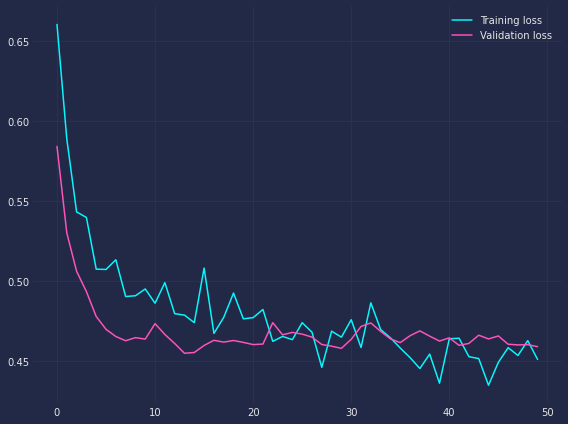

In [62]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["loss"], 
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_history["val_loss"], 
        label="Validation loss")
ax.legend()

plt.tight_layout()
plt.show()

In [63]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 0.3589 - accuracy: 0.8591

Test accuracy: 0.8590909242630005


In [64]:
y_pred = model.predict(X_test)

In [65]:
len(y_test)

220

In [66]:
y_pred

array([[0.6936817 ],
       [0.2225486 ],
       [0.9305458 ],
       [0.42759693],
       [0.6750417 ],
       [0.39926514],
       [0.5346145 ],
       [0.14521626],
       [0.14522019],
       [0.20232898],
       [0.70317656],
       [0.44693553],
       [0.22222134],
       [0.20233724],
       [0.6328513 ],
       [0.83093405],
       [0.9295393 ],
       [0.9909045 ],
       [0.5346145 ],
       [0.5824827 ],
       [0.6943593 ],
       [0.14522019],
       [0.17990038],
       [0.14517707],
       [0.0987505 ],
       [0.14533377],
       [0.22722855],
       [0.31244552],
       [0.20233724],
       [0.1452012 ],
       [0.31181282],
       [0.20232901],
       [0.98743135],
       [0.8384045 ],
       [0.8384045 ],
       [0.23155451],
       [0.14508119],
       [0.1452012 ],
       [0.99678886],
       [0.92701507],
       [0.17720154],
       [0.19135985],
       [0.5824827 ],
       [0.29841945],
       [0.93863297],
       [0.20489976],
       [0.1452012 ],
       [0.202

In [67]:
np.round(abs(y_pred))

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],

In [68]:
print('Accuracy score of Test: ', accuracy_score(y_test, np.round(abs(y_pred)))*100,'%')

Accuracy score of Test:  85.9090909090909 %


<AxesSubplot:>

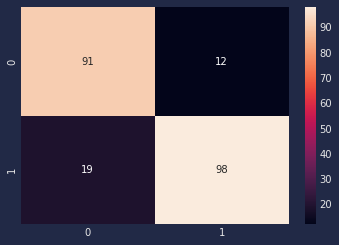

In [69]:
sns.heatmap(confusion_matrix(y_test, np.round(abs(y_pred))),annot=True)


In [70]:
confusion_matrix(y_test, np.round(abs(y_pred)))

array([[91, 12],
       [19, 98]])

In [71]:
print(classification_report(y_test, np.round(abs(y_pred))))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       103
           1       0.89      0.84      0.86       117

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



### Model Deployment

In [72]:
test = test[rfe_feature]

In [73]:
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

In [74]:
predicted = model.predict(test_scaled)

In [75]:
final_pred = np.round(abs(predicted))

In [76]:
final_pred = final_pred.flatten().astype(int)

In [77]:
fin_submission = pd.DataFrame({
    "PassengerId": gender_submission["PassengerId"],
    "Survived" : final_pred
})

In [78]:
fin_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [79]:
submiision_csv = fin_submission.to_csv('/kaggle/working/submission.csv',index=False)